In [1]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

### Experiment 3b - Coupled 2-box with vertical diffusion, only the atmospheric box is visible

List of experiments:

a) 2xCO2

b) High Emissions

c) Overshoot

#### Setup and Run Experiments

In [3]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 1

# Initialize forcing vectors and run experiments
experiments = ['2xCO2','High Emissions','Overshoot']
forcings, full_outputs, T_out = {}, {}, {}
for i, exp in enumerate(experiments):
  full_outputs[exp] = BudykoSellers.Run_Budyko_Sellers(exp_flag=i,vert_diff_flag=1)
  forcings[exp] = full_outputs[exp]['forcing_ts'] # Don't tile the forcing like the other experiments
  T_out[exp] = np.squeeze(full_outputs[exp]['T_ts'])[0:n_boxes,:]

100%|██████████| 365239/365239 [00:06<00:00, 59507.62it/s]


### Method X: DMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 4.670618232832037
	Test: High Emissions - 0.5736749523642793
	Test: Overshoot - 3.023835055264035
Train: High Emissions - L2 Error
	Test: 2xCO2 - 6.061036505035828
	Test: High Emissions - 0.04618415394495053
	Test: Overshoot - 1.0176750788076279
Train: Overshoot - L2 Error
	Test: 2xCO2 - 6.71697630132649
	Test: High Emissions - 1.4286670835064545
	Test: Overshoot - 0.5788151031343205


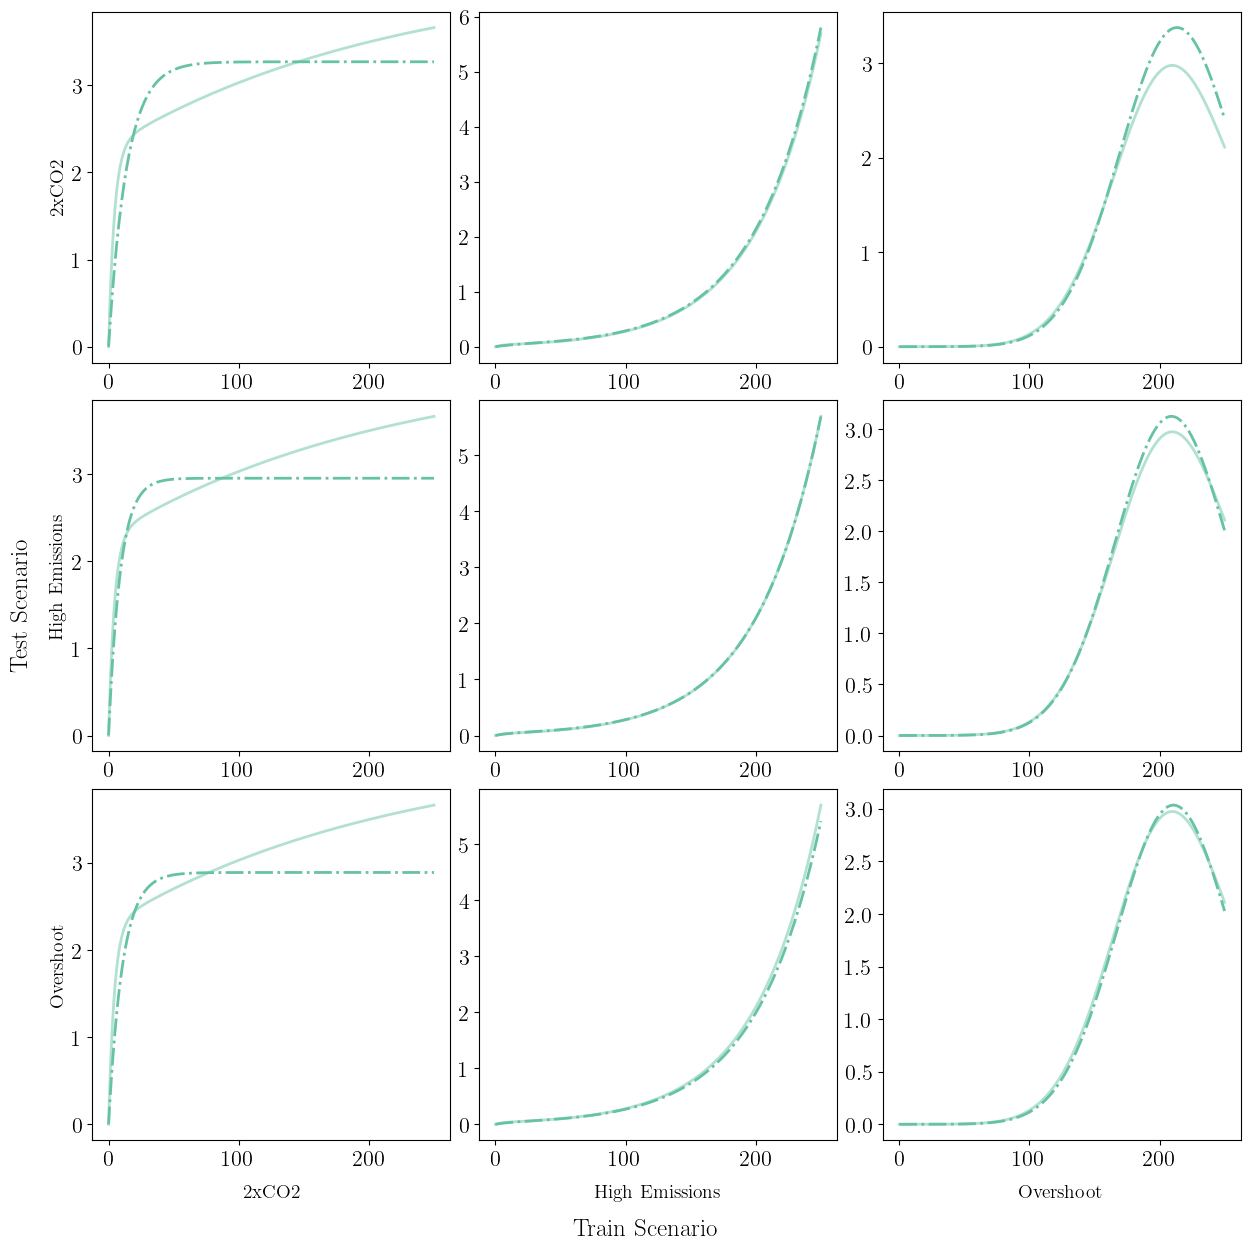

In [4]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_DMD, T_pred_DMD = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'DMD', w0, t, dt, n_steps, n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_DMD, experiments)

### Method X: EDMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.658951155800141
	Test: High Emissions - 97.74360647309442
	Test: Overshoot - 8.786702998660546
Train: High Emissions - L2 Error
	Test: 2xCO2 - 107312352.59877102
	Test: High Emissions - 0.4194771389076702
	Test: Overshoot - 24451.80054325246
Train: Overshoot - L2 Error
	Test: 2xCO2 - 7.456375234256526
	Test: High Emissions - 1.706364544494686
	Test: Overshoot - 0.009460594886480284


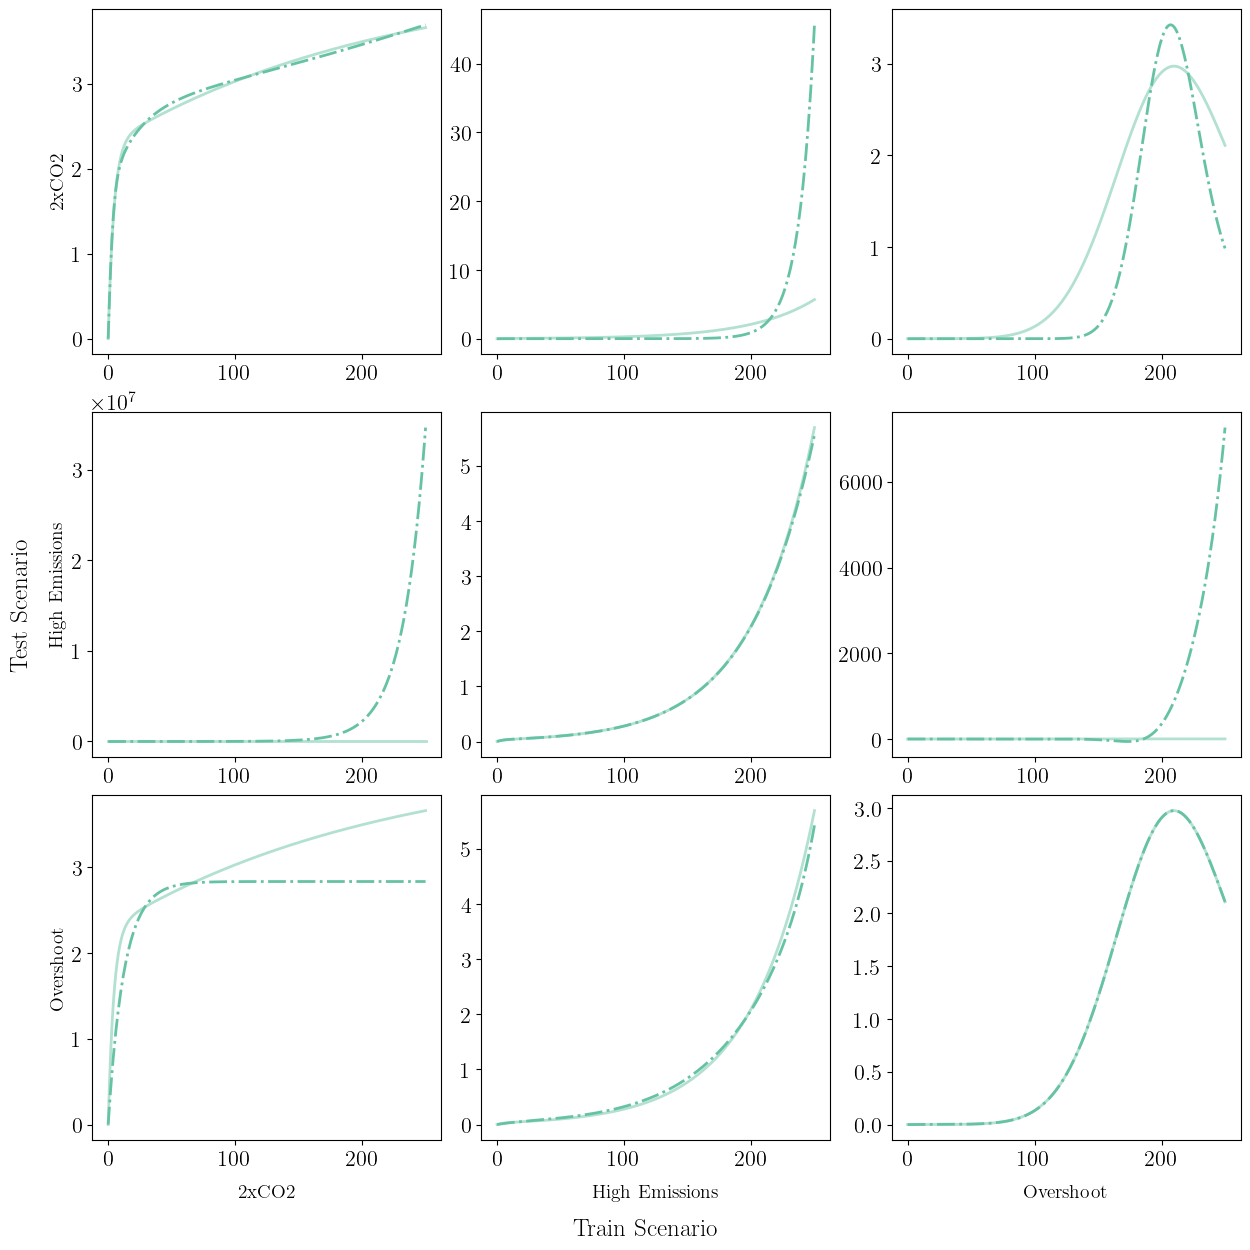

In [10]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
w_dict = emulator_utils.Vector_Dict(method='polynomial', degree=4)
F_dict = emulator_utils.Vector_Dict(method='polynomial', degree=4)
operator_EDMD, T_pred_EDMD = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'EDMD', w0, t, dt, n_steps, n_boxes, w_dict, F_dict)
emulator_utils.plot_true_pred(T_out, T_pred_EDMD, experiments)

### Method X: Deconvolution

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 3.5392440381009783e-15
	Test: High Emissions - 0.29568224363368756
	Test: Overshoot - 0.17317217115348268
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.508806690414932
	Test: High Emissions - 2.3384329397801748e-14
	Test: Overshoot - 0.27532699806329525
Train: Overshoot - L2 Error
	Test: 2xCO2 - 412458.8357297317
	Test: High Emissions - 6685.992080220396
	Test: Overshoot - 2.3737418501602848e-14


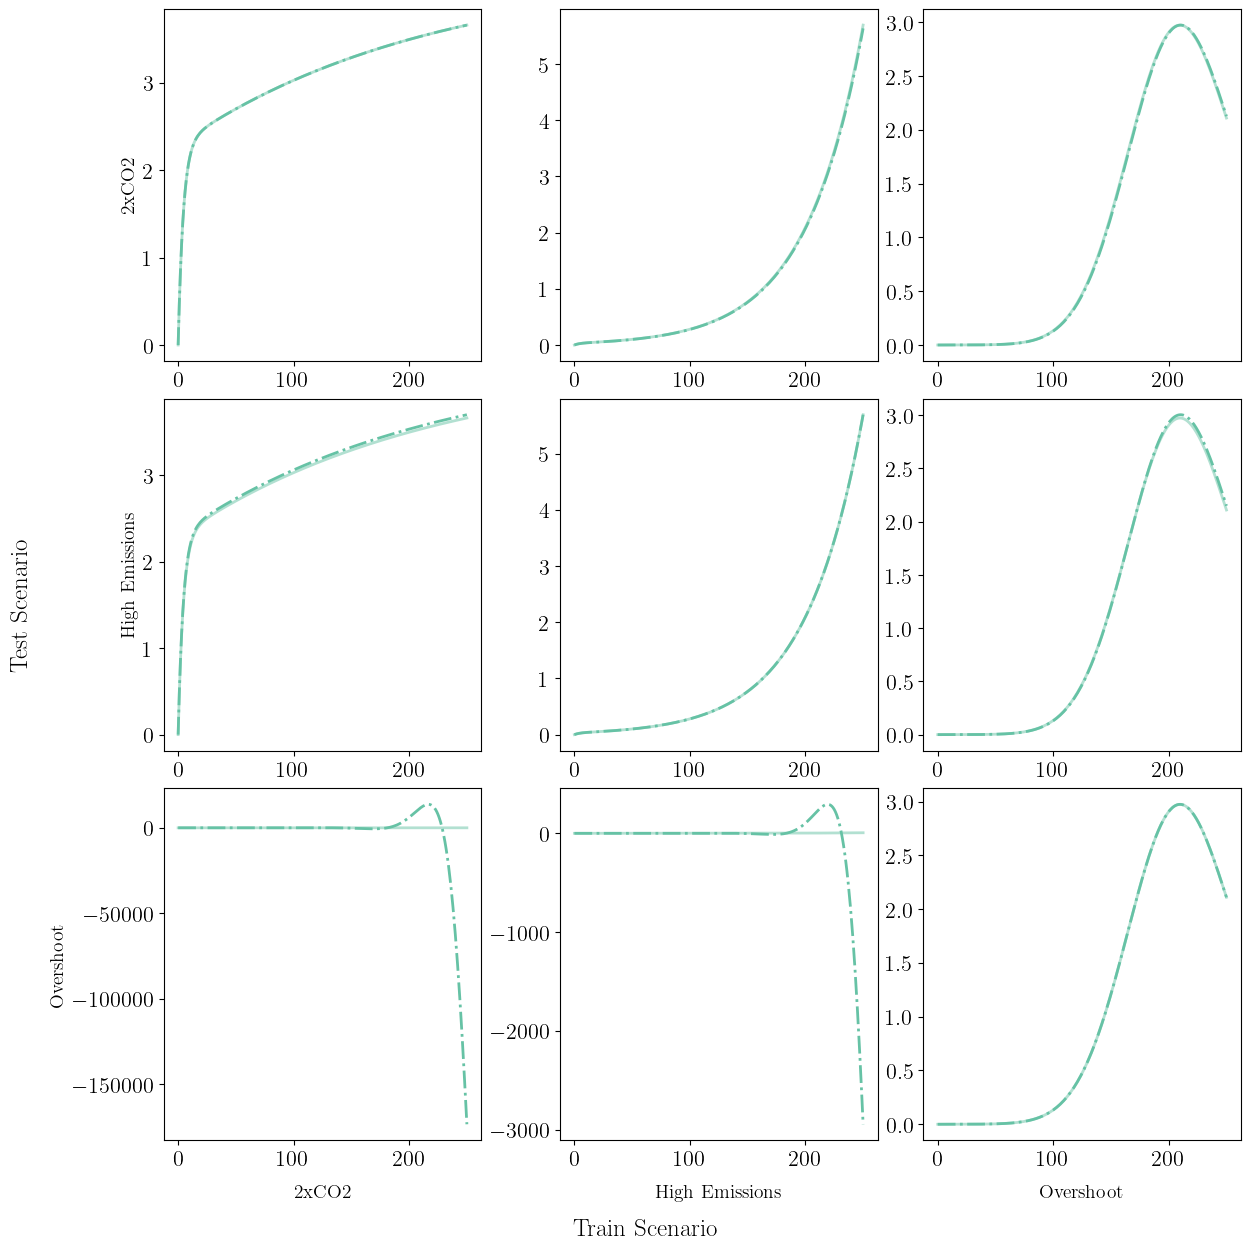

In [11]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_deconvolve, T_pred_deconvolve = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'deconvolve', w0, t, dt, n_steps, n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_deconvolve, experiments)

### Method X: Direct Diagnosis (FDT)

100%|██████████| 365239/365239 [00:05<00:00, 65683.87it/s]


Train: Impulse Forcing - L2 Error
	Test: 2xCO2 - 0.005721946699657816
	Test: High Emissions - 0.29156708842407075
	Test: Overshoot - 0.17197560723948419


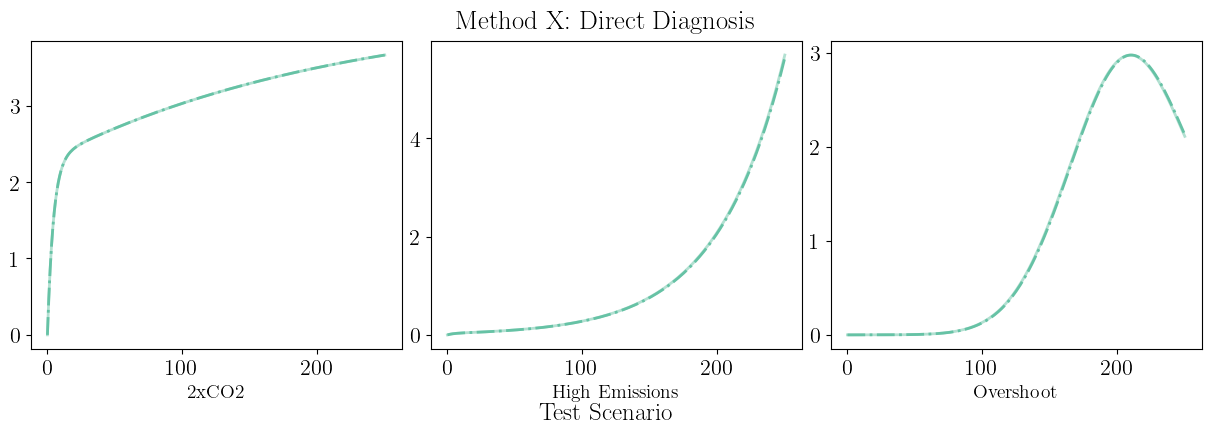

In [12]:
operator_direct, T_pred_direct = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'direct', w0, t, dt, n_steps, n_boxes, vert_diff_flag=1)
emulator_utils.plot_true_pred_direct(T_out, T_pred_direct, experiments)

### Method X: Exponential Fit

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 0.0806371   0.3268406  -0.15193303 -1.0668867 ]
	Test: 2xCO2 - 6.237018830192568
	Test: High Emissions - 4.981841416845509
	Test: Overshoot - 3.7489569550790476
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.0579625   0.77528708 -0.01134497 -1.08132455]
	Test: 2xCO2 - 1.9489921479976178
	Test: High Emissions - 0.02860961445420902
	Test: Overshoot - 0.38659111279048636
Train: Overshoot - L2 Error
Exponential Fit Results:
 [ 0.03678319  0.37572334 -0.02478534 -1.12833887]
	Test: 2xCO2 - 4.011996541111644
	Test: High Emissions - 0.10108561203209186
	Test: Overshoot - 0.052238947446259516


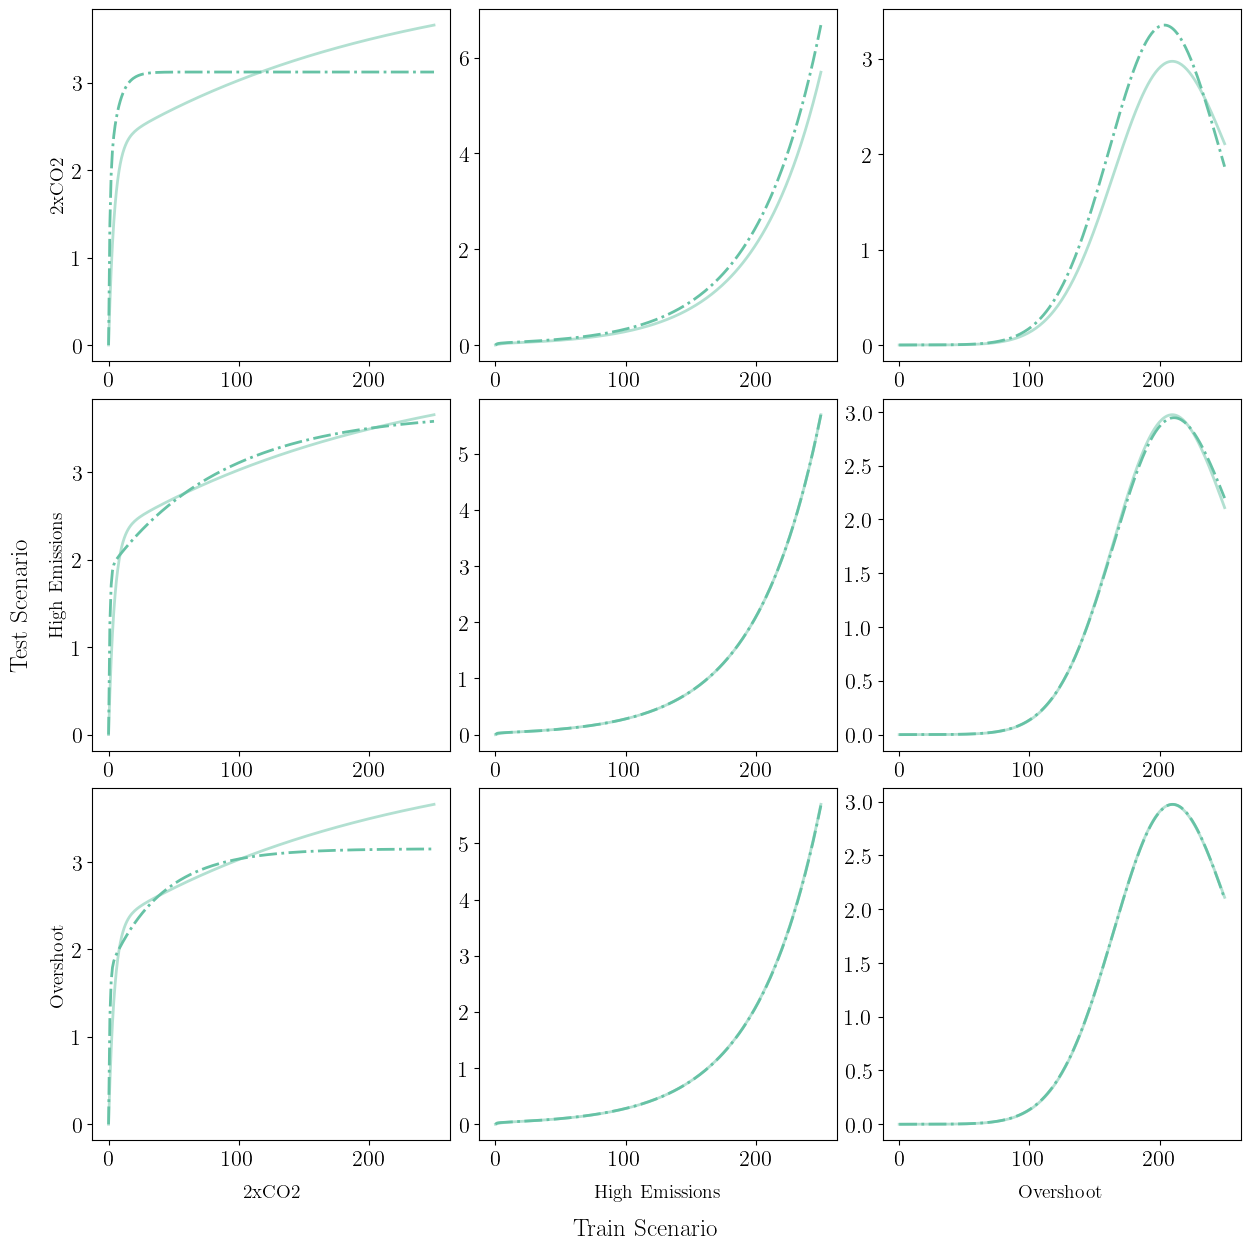

In [17]:
B=np.array([1.0])
operator_fit, T_pred_fit = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'fit', w0, t, dt, n_steps, n_boxes, n_modes=2, B=B)
emulator_utils.plot_true_pred(T_out, T_pred_fit, experiments)